<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA - EDUCACIÓN CONTINUADA** <br>
**Análisis espacial de datos y sus aplicaciones en Python** <br>
**PROFESOR:** Germán González <br><br>





# Parte 2 - Simulación de datos referenciados en Bogotá 

In [2]:
# !pip3 install geopandas
# !pip3 install shapely
# !pip3 install numpy
# !pip3 install folium
# !pip3 install geojson
# !pip3 install branca

from shapely import geometry, ops
import numpy as np
import shapely.geometry as shg
from shapely.geometry.polygon import Polygon
from shapely.geometry import Point
import random
import pandas as pd
import geopandas as gpd
import folium
import json
import geojson
from shapely.ops import cascaded_union
import branca
import re



# Cargar los datos del polígonos de Bogotá

In [3]:
Bogota = pd.read_pickle('Bogota.gzip',compression='gzip')

In [4]:
Bogota

,Nombre,Poligono
0,Bogota,POLYGON ((-74.07419209899996 4.836546038000051...


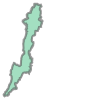

In [5]:
Bogota['Poligono'].iloc[0]

In [6]:
#### ----- Extraemos la información ----- ### 
Figura_bogota = Bogota['Poligono'].iloc[0]

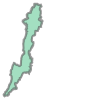

In [7]:
Figura_bogota

In [8]:
Centroide = Figura_bogota.centroid

In [9]:
Cordenadas = Centroide.coords[0]
print(Cordenadas)

(-74.18107270162268, 4.316107698094774)


In [10]:
Latitud = Cordenadas[1]
Longitud = Cordenadas[0]

## Mapa

In [11]:
Mapa = folium.Map(location=[4.316107698094774,-74.18107270162268],zoom_start=10,tiles='cartodbpositron')

In [12]:
#### ------ Crear geojson ----- ###### 
geojson_bogota = geojson.Feature(geometry=Figura_bogota)
### ----- Organizar la estructura ---- ###
geo_str = json.dumps(geojson_bogota) 
####### ------- Cargarlo ----- #######
geo_str = json.loads(geo_str)

## Figura

In [14]:
folium.GeoJson(geo_str,
style_function=lambda feature: {
    'fillColor': 'gray',
    'color': '#7d868c',
    'weight': 1,
    'fillOpacity':0.2,
},
highlight_function=lambda x: {'weight':10,'fillColor':'#fec821','color': '#fec821'},tooltip='Bogota',
name='Capa').add_to(Mapa)


folium.LayerControl().add_to(Mapa)




In [16]:
Mapa

## Generar puntos aleatorios

In [61]:
def generate_random(number, poligono):
    list_of_points = []
    minx, miny, maxx, maxy = poligono.bounds
    counter = 0
    ## Tener 100 puntos en la lista 
    while counter <= number:
        #### ----- Simular ----- #### 
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if poligono.contains(pnt):
            list_of_points.append(pnt)
            counter += 1
    
    return list_of_points






In [64]:

##### Generar 10 puntos aleatorios ----- #######
Puntos_aleatorios = generate_random(number = 100,poligono=Figura_bogota)


In [69]:
b=Puntos_aleatorios[1]

In [70]:
b.coords[0]

(-74.33012100040585, 3.9516841946815204)

In [71]:
###### -------- Extraer cordenadas ------- ##### 
Coordenadas_aleatorias = list(map(lambda x: x.coords[0],Puntos_aleatorios))

In [73]:
Coordenadas_aleatorias = pd.DataFrame(Coordenadas_aleatorias)
Coordenadas_aleatorias.columns = ['Longitud','Latitud']

In [75]:
###### --- Graficar puntos en el mapa ------ ###### 
for j in range(0,len(Coordenadas_aleatorias)):
    folium.Marker([Coordenadas_aleatorias['Latitud'].iloc[j],Coordenadas_aleatorias['Longitud'].iloc[j]]).add_to(Mapa)




In [76]:
Mapa